Name : Gourav Verma<br>
Class : DSC540-T303<br>
Topic : Data Formats/Data Structures/Data Sources<br>
Assignment : Weeks 5 & 6 Excercises<br>

### 1. Activity 7: Reading Tabular Data from a Web Page and Creating Dataframe

In [1]:
# Load necessary libraries
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import sqlite3

In [2]:
# Read the page using bs4

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
GDP = requests.get(url).text
soup = BeautifulSoup(GDP)

In [3]:
# Find the table structure you will nead to deal with(how many tables there are?)

all_tabs = soup.find_all("table")
print('Total number of <table> is : ', len(all_tabs))

Total number of <table> is :  10


In [4]:
# Select Right table using bs4

tab_GDP = soup.find("table", attrs={"class": "wikitable"})  #store table with class = wikitable

# Table titles

tab_GDP_data = tab_GDP.tbody.find_all("tr")                 # Select all 'tr' in tbody tag

heads = []
for td in tab_GDP_data[0].find_all("td"):                   # Select all 'td' in 1st 'tr' to get the titles 
    heads.append(td.b.text.replace('\n', ' ').strip())      # Add titles texts into the list
    
heads


['Per the International Monetary Fund (2019 estimates)',
 'Per the World Bank (2018)',
 'Per the United Nations (2017)']

In [5]:
# Get the table's sub headers

tab_GDP_sub = tab_GDP_data[1].find_all("table")             # Store sub tables
print('Total number of sub tabels is : ', len(tab_GDP_sub)) # We have total 3 sub tables

sub_heads = []
for th in tab_GDP_sub[0].find_all("th"):                    # Select all 'th' in 1st 'table' to get titles
    sub_heads.append(th.text.replace('\n', ' ').strip())    # All sub titles texts into the list
    
sub_heads


Total number of sub tabels is :  3


['Rank', 'Country/Territory', 'GDP(US$million)']

In [6]:
# Separate the source names and their corresponding data

sources = []
for td in tab_GDP_data[0].find_all("td"):                   # Select all 'td' in 1st 'tr' to get the titles 
    a = td.find('a', href=True)
    sources.append('https://en.wikipedia.org'+a['href'])   # Add source into the list

sources

['https://en.wikipedia.org/wiki/International_Monetary_Fund',
 'https://en.wikipedia.org/wiki/World_Bank',
 'https://en.wikipedia.org/wiki/United_Nations']

In [7]:
# Get the table data

Data = {}

for table, head in zip(tab_GDP_sub, heads):
    
    # Get all the rows of table
    tab_data = []
    
    # find all 'tr's in table tbody
    for tr in table.tbody.find_all("tr"):
        tab_row = {}
        
        # find all 'td's in 'tr' and zip it with sub_heads
        for td, th in zip(tr.find_all("td"), sub_heads):
            tab_row[th] = td.text.replace('\n', '').strip()
        
        # Add each row into the table
        tab_data.append(tab_row)
        
    Data[head] = tab_data

#print(Data)

Data
        

{'Per the International Monetary Fund (2019 estimates)': [{},
  {'Rank': '',
   'Country/Territory': 'World[19]',
   'GDP(US$million)': '87,265,226'},
  {'Rank': '1',
   'Country/Territory': 'United States',
   'GDP(US$million)': '21,439,453'},
  {'Rank': '—',
   'Country/Territory': 'European Union[23][n 1]',
   'GDP(US$million)': '18,705,132'},
  {'Rank': '2',
   'Country/Territory': 'China[n 2]',
   'GDP(US$million)': '14,140,163'},
  {'Rank': '3', 'Country/Territory': 'Japan', 'GDP(US$million)': '5,154,475'},
  {'Rank': '4',
   'Country/Territory': 'Germany',
   'GDP(US$million)': '3,863,344'},
  {'Rank': '5', 'Country/Territory': 'India', 'GDP(US$million)': '2,935,570'},
  {'Rank': '6',
   'Country/Territory': 'United Kingdom',
   'GDP(US$million)': '2,743,586'},
  {'Rank': '7', 'Country/Territory': 'France', 'GDP(US$million)': '2,707,074'},
  {'Rank': '8', 'Country/Territory': 'Italy', 'GDP(US$million)': '1,988,636'},
  {'Rank': '9', 'Country/Territory': 'Brazil', 'GDP(US$million

### 2. Activity 8: Handling Outliers and Missing Data

In [8]:
# Read CSV
visit_df = pd.read_csv('visit_data.csv')

# Dataframe Details
visit_df.head()
shp1 = visit_df.shape
print('Number of rows in the dataframe is : ', shp1[0])

Number of rows in the dataframe is :  1000


In [9]:
# Check duplicates
print('Duplicate entries in email column is : ', visit_df.duplicated(['email']).sum())

Duplicate entries in email column is :  0


In [10]:
# Check for NaN
visit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
id            1000 non-null int64
first_name    704 non-null object
last_name     704 non-null object
email         1000 non-null object
gender        495 non-null object
ip_address    1000 non-null object
visit         974 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [11]:
# Dropna from visit column
visit_df1 = visit_df.dropna(subset=['visit'], axis=0)
shp2 = visit_df1.shape
print('Number of rows in new dataframe is : ', shp2[0])

Number of rows in new dataframe is :  974


{'whiskers': [<matplotlib.lines.Line2D at 0x1a75bcf3ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a75c31ec08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a75c3137c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a75c31edc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a75c323b08>],
 'means': []}

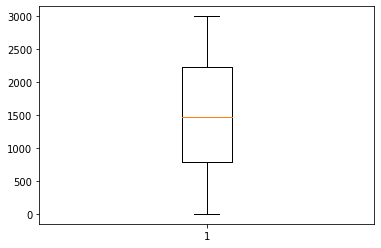

In [12]:
# Plot Box plot
plt.boxplot(visit_df1.visit)   # Box plot

We can see that values in visit column ranges from 0 to 3000, and majority of the values are between 800 to 2300.
The values below 100 or above 2900 can b considered as outliers.

In [13]:
# Remove Outliers
visit_df2 = visit_df1[(visit_df1['visit'] <= 2900) & (visit_df1['visit'] >= 100)]
shp3 = visit_df2.shape
print('Number of rows in new dataframe is : ', shp3[0])

Number of rows in new dataframe is :  923


### 3. Working with SQL

In [14]:
# Create a table 

query = """
CREATE TABLE DB_Tbl
(Name VARCHAR(20), 
 Address VARCHAR(35), 
 City VARCHAR(10), 
 State VARCHAR(2), 
 Zip NUM(5), 
 Phone Number NUM(10)
 );"""

con = sqlite3.connect('mydata.sqlite') # Connect to server
con.execute(query)                    # Commented as table is already created
con.commit()                           # Commit changes

In [15]:
# Insert 10 rows into database

data = [('Rob Parlor', '6812, Pacific St', 'Omaha', 'NE', 68106, 1234567891),
        ('Glen Jones', '7474, Pine St', 'Omaha', 'NE', 68106, 2345678912),
        ('Vijay W', '8900, Billard Av', 'Ralston', 'NE', 68127, 3456789123),
        ('Saurabh Biswas', '7510 Lakeview Ct', 'La Vista', 'NE', 68961, 4567891234),
        ('Gourav Verma', '6855, Pacific St', 'Omaha', 'NE', 68106, 5678912345),
        ('Brian Sampson', '1855, Center St', 'Omaha', 'NE', 68116, 9670912345),
        ('Terry Durham', '58, Boys Town', 'Omaha', 'NE', 69116, 6678910345),
        ('Chandu Y', '905, Pacific St', 'Omaha', 'NE', 68106, 5670002345),
        ('Shani Kumar', '1119, Crosswinds apt', 'Omaha', 'NE', 68160, 8678912005),
        ('Dan Cross', '6855, Pacific St', 'Omaha', 'NE', 68106, 7600012345)]

stmt = "INSERT INTO DB_Tbl VALUES(?, ?, ?, ?, ?, ?)"

con.executemany(stmt, data)
con.commit()

In [16]:
# Display the content of database
cursor = con.execute('select * from DB_Tbl')
rows = cursor.fetchall()
rows

[('Rob Parlor', '6812, Pacific St', 'Omaha', 'NE', 68106, 1234567891),
 ('Glen Jones', '7474, Pine St', 'Omaha', 'NE', 68106, 2345678912),
 ('Vijay W', '8900, Billard Av', 'Ralston', 'NE', 68127, 3456789123),
 ('Saurabh Biswas', '7510 Lakeview Ct', 'La Vista', 'NE', 68961, 4567891234),
 ('Gourav Verma', '6855, Pacific St', 'Omaha', 'NE', 68106, 5678912345),
 ('Brian Sampson', '1855, Center St', 'Omaha', 'NE', 68116, 9670912345),
 ('Terry Durham', '58, Boys Town', 'Omaha', 'NE', 69116, 6678910345),
 ('Chandu Y', '905, Pacific St', 'Omaha', 'NE', 68106, 5670002345),
 ('Shani Kumar', '1119, Crosswinds apt', 'Omaha', 'NE', 68160, 8678912005),
 ('Dan Cross', '6855, Pacific St', 'Omaha', 'NE', 68106, 7600012345)]

In [17]:
# Write data from database into a pandas dataframe

DF_Tab = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])
DF_Tab

,Name,Address,City,State,Zip,Phone
0,Rob Parlor,"6812, Pacific St",Omaha,NE,68106,1234567891
1,Glen Jones,"7474, Pine St",Omaha,NE,68106,2345678912
2,Vijay W,"8900, Billard Av",Ralston,NE,68127,3456789123
3,Saurabh Biswas,7510 Lakeview Ct,La Vista,NE,68961,4567891234
4,Gourav Verma,"6855, Pacific St",Omaha,NE,68106,5678912345
5,Brian Sampson,"1855, Center St",Omaha,NE,68116,9670912345
6,Terry Durham,"58, Boys Town",Omaha,NE,69116,6678910345
7,Chandu Y,"905, Pacific St",Omaha,NE,68106,5670002345
8,Shani Kumar,"1119, Crosswinds apt",Omaha,NE,68160,8678912005
9,Dan Cross,"6855, Pacific St",Omaha,NE,68106,7600012345
